In [1]:
import cdsapi
import cfgrib
import numpy as np
import pandas as pd
import scipy
import xarray as xr
import matplotlib.pyplot as plt
import time
import os
import fsspec
import zipfile
from pathlib import Path

In [2]:
c = cdsapi.Client()

# # try download of just one variable
# c.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'format': 'netcdf',
#         'variable': ['total_precipitation'],
#         'year': '2024',
#         'month': '01',
#         'day': ['01'],
#         'time': [f'{h:02d}:00' for h in range(24)],
#         'area': [50, -130, 25, -65],
#     },
#     'C:/Users/mwood/1projects/rainfall_pred/data/raw/era5_conus_20240101.nc' # save as
# )

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '2m_temperature',
            'surface_pressure',
            '10m_u_component_of_wind',
            '10m_v_component_of_wind',
            'cape',
        ],
        'year': '2024',
        'month': '01',
        'day': ['01'],
        'time': [f'{h:02d}:00' for h in range(24)],
        'area': [50, -130, 25, -65],  # north, west, south, east
    },
    'C:/Users/mwood/1projects/rainfall_pred/data/raw/era5_conus_20240101_inputs.nc' # save as
)
print('temp, pres, wind & cape downloaded')
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            'total_precipitation',
            'convective_precipitation'
        ],
        'year': '2024',
        'month': '01',
        'day': ['01'],
        'time': [f'{h:02d}:00' for h in range(24)],
        'area': [50, -130, 25, -65],
    },
    "C:/Users/mwood/1projects/rainfall_pred/data/raw/era5_conus_20240101_precip.nc"
)
print('precip downloaded')

2025-07-14 21:06:11,378 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-14 21:06:12,119 INFO Request ID is 278e7f57-d827-4b89-b797-009d070e5aec
2025-07-14 21:06:12,297 INFO status has been updated to accepted
2025-07-14 21:06:26,548 INFO status has been updated to successful


3d061022a7bcb4ff8e740aa143668162.nc:   0%|          | 0.00/4.95M [00:00<?, ?B/s]

temp, pres, wind & cape downloaded


2025-07-14 21:06:29,989 INFO Request ID is aeebd2b0-e20e-4ebf-9ab2-8c5ad2b1de0a
2025-07-14 21:06:30,169 INFO status has been updated to accepted
2025-07-14 21:06:38,944 INFO status has been updated to running
2025-07-14 21:06:44,159 INFO status has been updated to successful


5874fae1589c10fed349cc6a10cfb83f.nc:   0%|          | 0.00/574k [00:00<?, ?B/s]

precip downloaded


dataset merged
precip updated
merged dataset saved


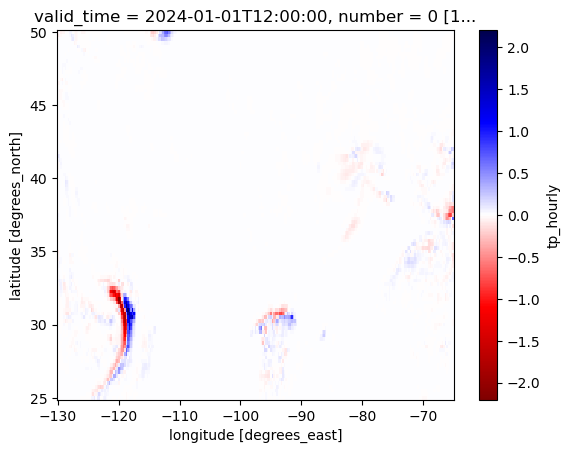

In [3]:
input_ds = xr.open_dataset("C:/Users/mwood/1projects/rainfall_pred/data/raw/era5_conus_20240101_inputs.nc", engine="netcdf4")
precip_ds = xr.open_dataset("C:/Users/mwood/1projects/rainfall_pred/data/raw/era5_conus_20240101_precip.nc", engine="netcdf4")
ds = xr.merge([input_ds, precip_ds])
print("dataset merged")


# print(ds.data_vars)
ds['tp_mm'] = ds['tp'] * 1000 # convert to mm
ds['tp_hourly'] = ds['tp_mm'].diff(dim='valid_time') # find hourly rate (mm/hr)
ds = ds.isel(valid_time=slice(1, None)) # since first timestep is NaN after .diff
print('precip updated')

ds.to_netcdf(path="C:/Users/mwood/1projects/rainfall_pred/data/processed/era5_conus_20240101.nc")
print("merged dataset saved")

ds['tp_hourly'].isel(valid_time=11).plot(cmap='seismic_r')